In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# reading the dataset
dataset = pd.read_csv('subscription.csv')

In [3]:
dataset.head()

,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
0,1459,"January, 2015",29,Spain,ads,4,0
1,12474,"January, 2015",49,France,ads,5,0
2,12294,"January, 2015",49,Germany,ads,2,0
3,3878,"January, 2015",49,China,ads,1,0
4,9567,"January, 2015",49,UK,ads,5,0


In [4]:
# checking for null values
dataset.isnull().sum()

user_id                      0
subscription_signup_date     0
subscription_monthly_cost    0
country                      0
source                       0
billing_cycles               0
is_active                    0
dtype: int64

In [5]:
# displaying value count of subscription_monthly_cost
dataset["subscription_monthly_cost"].value_counts()

49    300397
29    146362
99     53241
Name: subscription_monthly_cost, dtype: int64

In [6]:
# calculating the number of users of $29 who stayed subscribed after each month
l_29 = np.arange(7)
dp_29 = dataset[(dataset.subscription_monthly_cost == 29)].shape[0]
for i in range(7):
    l_29[i] = dp_29 - dataset[(dataset.subscription_monthly_cost == 29) & (dataset.billing_cycles == i+1)].shape[0]
    dp_29 = l_29[i]
l_29

array([88921, 67103, 55066, 47279, 41774, 37638, 34527])

In [7]:
# calculating subscription rentention rate
sr_29 = (l_29/146362)
sr_29

array([0.60754157, 0.45847283, 0.37623154, 0.32302784, 0.28541561,
       0.25715691, 0.2359014 ])

In [8]:
# calculating the number of users of $49 who stayed subscribed after each month
l_49 = np.arange(7)
dp_49 = dataset[(dataset.subscription_monthly_cost == 49)].shape[0]
for i in range(7):
    l_49[i] = dp_49 - dataset[(dataset.subscription_monthly_cost == 49) & (dataset.billing_cycles == i+1)].shape[0]
    dp_49 = l_49[i]
l_49

array([115252,  61956,  40266,  28978,  22251,  17846,  14673])

In [9]:
# calculating subscription rentention rate
sr_49 = (l_49/300397)
sr_49

array([0.38366562, 0.20624707, 0.13404262, 0.09646568, 0.07407198,
       0.05940805, 0.04884536])

In [10]:
# calculating the number of users of $99 who stayed subscribed after each month
l_99 = np.arange(7)
dp_99 = dataset[(dataset.subscription_monthly_cost == 99)].shape[0]
for i in range(7):
    l_99[i] = dp_99 - dataset[(dataset.subscription_monthly_cost == 99) & (dataset.billing_cycles == i+1)].shape[0]
    dp_99 = l_99[i]
l_99

array([8453, 3729, 2258, 1580, 1181,  955,  799])

In [11]:
# calculating subscription rentention rate
sr_99 = (l_99/53241)
sr_99

array([0.15876862, 0.07004001, 0.04241092, 0.02967638, 0.02218215,
       0.0179373 , 0.01500723])

In [12]:
x = np.arange(1,8)
x

array([1, 2, 3, 4, 5, 6, 7])

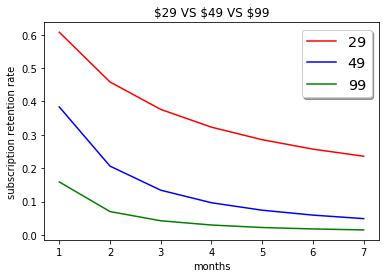

In [13]:
# graphical represnetation of the 3 datasets created
fig, ax = plt.subplots()
ax.plot(x, sr_29, 'r', label='29')
ax.plot(x, sr_49, 'b', label='49')
ax.plot(x, sr_99, 'g', label='99')
plt.xlabel("months")
plt.ylabel("subscription retention rate")
plt.title("$29 VS $49 VS $99")
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

In [14]:
# exponential regression
def model_func(t, A, K):
    return A * np.exp(K * t)

def fit_exp_linear(t, y, C = 0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K

In [15]:
A_29, K_29 = fit_exp_linear(x, sr_29)
y_29 = model_func(x, A_29, K_29)
A_49, K_49 = fit_exp_linear(x, sr_49)
y_49 = model_func(x, A_49, K_49)
A_99, K_99 = fit_exp_linear(x, sr_99)
y_99 = model_func(x, A_99, K_99)

rmse_er_29 = np.sqrt(np.mean((sr_29 - y_29)**2))
rmse_er_49 = np.sqrt(np.mean((sr_49 - y_49)**2))
rmse_er_99 = np.sqrt(np.mean((sr_99 - y_99)**2))

In [16]:
rmse_er_29

0.028097205872606588

In [17]:
rmse_er_49

0.032926100713908765

In [18]:
rmse_er_99

0.01877064628296308

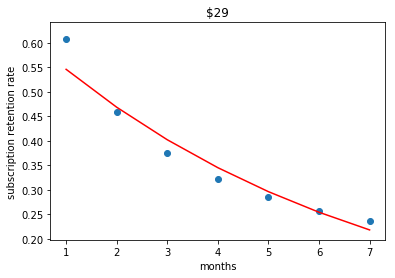

In [19]:
# plotting exponential regression fit on $29 dataset
plt.scatter(x,sr_29)
plt.plot(x,y_29, 'r')
plt.xlabel("months")
plt.ylabel("subscription retention rate")
plt.title("$29")
plt.show()

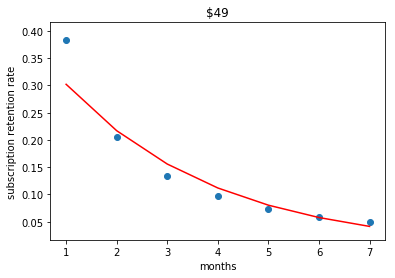

In [20]:
# plotting exponential regression fit on $49 dataset
plt.scatter(x,sr_49)
plt.plot(x,y_49, 'r')
plt.xlabel("months")
plt.ylabel("subscription retention rate")
plt.title("$49")
plt.show()

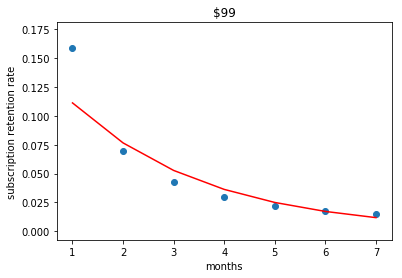

In [21]:
# plotting exponential regression fit on $99 dataset
plt.scatter(x,sr_99)
plt.plot(x,y_99, 'r')
plt.xlabel("months")
plt.ylabel("subscription retention rate")
plt.title("$99")
plt.show()

In [22]:
# reshapping arrays 
x = x.reshape(-1,1)
sr_29 = sr_29.reshape(-1,1)
sr_49 = sr_49.reshape(-1,1)
sr_99 = sr_99.reshape(-1,1)

In [23]:
# Linear regression

from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()
regressor1.fit(x,sr_29)
regressor2.fit(x,sr_49)
regressor3.fit(x,sr_99)

y_pred_1 = regressor1.predict(x)
y_pred_2 = regressor2.predict(x)
y_pred_3 = regressor3.predict(x)

rmse_lr_29 = np.sqrt(np.mean((sr_29 - y_pred_1)**2))
rmse_lr_49 = np.sqrt(np.mean((sr_49 - y_pred_2)**2))
rmse_lr_99 = np.sqrt(np.mean((sr_99 - y_pred_3)**2))

In [24]:
rmse_lr_29 

0.040841356112774195

In [25]:
rmse_lr_49 

0.051955391501132854

In [26]:
rmse_lr_99 

0.025897134204060368

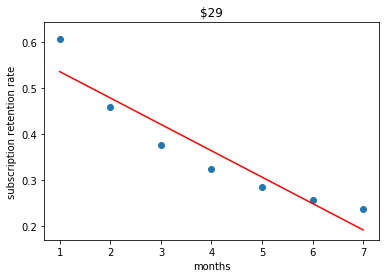

In [27]:
# plotting linear regression fit on $29 dataset
plt.scatter(x,sr_29)
plt.plot(x,y_pred_1, 'r')
plt.xlabel("months")
plt.ylabel("subscription retention rate")
plt.title("$29")
plt.show()

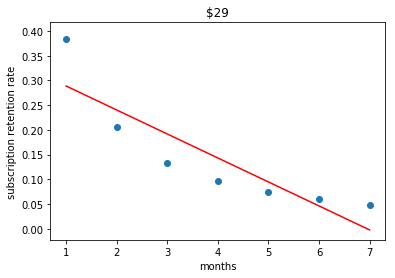

In [28]:
# plotting linear regression fit on $49 dataset
plt.scatter(x,sr_49)
plt.plot(x,y_pred_2, 'r')
plt.xlabel("months")
plt.ylabel("subscription retention rate")
plt.title("$29")
plt.show()

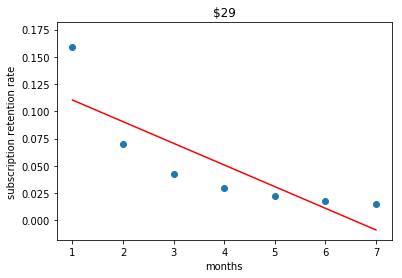

In [29]:
# plotting linear regression fit on $99 dataset
plt.scatter(x,sr_99)
plt.plot(x,y_pred_3, 'r')
plt.xlabel("months")
plt.ylabel("subscription retention rate")
plt.title("$29")
plt.show()

In [30]:
# predictions obtained from exponential regression model
x_test = np.arange(8,13)
sr_29_pred = model_func(x_test, A_29, K_29)
sr_29_pred

array([0.18763805, 0.16109425, 0.1383054 , 0.11874033, 0.10194299])

In [31]:
# predictions obtained from exponential regression model 
sr_49_pred = model_func(x_test, A_49, K_49)
sr_49_pred

array([0.02978728, 0.0213951 , 0.01536731, 0.01103777, 0.00792802])

In [32]:
# predictions obtained from exponential regression model
sr_99_pred = model_func(x_test, A_99, K_99)
sr_99_pred

array([0.00816587, 0.0056225 , 0.0038713 , 0.00266553, 0.00183531])

In [33]:
# subscription retention rate of users who have come through ads
l_ads = np.arange(8)
l_ads[0] = dataset[(dataset.source == 'ads')].shape[0]
dp_ads = dataset[(dataset.source == 'ads')].shape[0]
for i in range(1,8):
    l_ads[i] = dp_ads - dataset[(dataset.source == 'ads') & (dataset.billing_cycles == i)].shape[0]
    dp_ads = l_ads[i]
l_ads
sr_ads = (l_ads/l_ads[0])*100
sr_ads

array([100.        ,  38.88734743,  22.20938116,  15.2607312 ,
        11.49591405,   9.2043072 ,   7.67560421,   6.62365581])

In [34]:
# subscription retention rate of users who have come through seo
l_seo = np.arange(8)
l_seo[0] = dataset[(dataset.source == 'seo')].shape[0]
dp_seo = dataset[(dataset.source == 'seo')].shape[0]
for i in range(1,8):
    l_seo[i] = dp_seo - dataset[(dataset.source == 'seo') & (dataset.billing_cycles == i)].shape[0]
    dp_seo = l_seo[i]
l_seo
sr_seo = (l_seo/l_seo[0])*100
sr_seo

array([100.        ,  56.23946451,  42.00121107,  33.75938988,
        28.62543574,  24.78765363,  21.86799339,  19.4474903 ])

In [35]:
# subscription retention rate of users who have come through friend referral
l_fr = np.arange(8)
l_fr[0] = dataset[(dataset.source == 'friend_referral')].shape[0]
dp_fr = dataset[(dataset.source == 'friend_referral')].shape[0]
for i in range(1,8):
    l_fr[i] = dp_fr - dataset[(dataset.source == 'friend_referral') & (dataset.billing_cycles == i)].shape[0]
    dp_fr = l_fr[i]
l_fr
sr_fr = (l_fr/l_fr[0])*100
sr_fr

array([100.        ,  69.94432618,  61.70378254,  56.12821353,
        51.98542656,  48.75962011,  46.11102014,  43.65072867])

In [36]:
inp = np.arange(8)

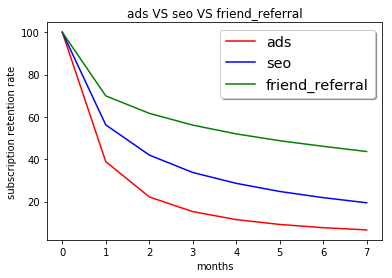

In [37]:
fig, ax = plt.subplots()
ax.plot(inp, sr_ads, 'r', label='ads')
ax.plot(inp, sr_seo, 'b', label='seo')
ax.plot(inp, sr_fr, 'g', label='friend_referral')
plt.xlabel("months")
plt.ylabel("subscription retention rate")
plt.title("ads VS seo VS friend_referral")
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

In [38]:
# subscription retention rate of users from US
l_US = np.arange(8)
l_US[0] = dataset[(dataset.country == 'US')].shape[0]
dp_US = dataset[(dataset.country == 'US')].shape[0]
for i in range(1,8):
    l_US[i] = dp_US - dataset[(dataset.country == 'US') & (dataset.billing_cycles == i)].shape[0]
    dp_US = l_US[i]
l_US
sr_US = (l_US/l_US[0])*100
sr_US

array([100.        ,  45.65087048,  28.42550501,  19.88531685,
        14.92843205,  11.73976082,   9.4875233 ,   7.89809334])

In [39]:
# subscription retention rate of users from UK
l_UK = np.arange(8)
l_UK[0] = dataset[(dataset.country == 'UK')].shape[0]
dp_UK = dataset[(dataset.country == 'UK')].shape[0]
for i in range(1,8):
    l_UK[i] = dp_UK - dataset[(dataset.country == 'UK') & (dataset.billing_cycles == i)].shape[0]
    dp_UK = l_UK[i]
l_UK
sr_UK = (l_UK/l_UK[0])*100
sr_UK

array([100.        ,  45.89378863,  28.51334765,  19.80668917,
        14.94213825,  11.73563319,   9.5734888 ,   7.94941481])

In [40]:
# subscription retention rate of users from Germany
l_germany = np.arange(8)
l_germany[0] = dataset[(dataset.country == 'Germany')].shape[0]
dp_germany = dataset[(dataset.country == 'Germany')].shape[0]
for i in range(1,8):
    l_germany[i] = dp_germany - dataset[(dataset.country == 'Germany') & (dataset.billing_cycles == i)].shape[0]
    dp_germany = l_germany[i]
l_germany
sr_germany = (l_germany/l_germany[0])*100
sr_germany

array([100.        ,  45.12839539,  27.84111351,  19.59097859,
        14.6474186 ,  11.51511063,   9.38680518,   7.84651016])

In [41]:
# subscription retention rate of users from france
l_france = np.arange(8)
l_france[0] = dataset[(dataset.country == 'France')].shape[0]
dp_france = dataset[(dataset.country == 'France')].shape[0]
for i in range(1,8):
    l_france[i] = dp_france - dataset[(dataset.country == 'France') & (dataset.billing_cycles == i)].shape[0]
    dp_france = l_france[i]
l_france
sr_france = (l_france/l_france[0])*100
sr_france

array([100.        ,  33.49463823,  17.77321823,  11.90042972,
         8.84789594,   6.9935349 ,   5.83407534,   4.96883589])

In [42]:
# subscription retention rate of users from India
l_India = np.arange(8)
l_India[0] = dataset[(dataset.country == 'India')].shape[0]
dp_India = dataset[(dataset.country == 'India')].shape[0]
for i in range(1,8):
    l_India[i] = dp_India - dataset[(dataset.country == 'India') & (dataset.billing_cycles == i)].shape[0]
    dp_India = l_India[i]
l_India
sr_India = (l_India/l_India[0])*100
sr_India

array([100.        ,  44.67278822,  32.69619173,  28.45274533,
        26.16028484,  24.67362109,  23.48470652,  22.57688384])

In [43]:
# subscription retention rate of users from Italy
l_Italy = np.arange(8)
l_Italy[0] = dataset[(dataset.country == 'Italy')].shape[0]
dp_Italy = dataset[(dataset.country == 'Italy')].shape[0]
for i in range(1,8):
    l_Italy[i] = dp_Italy - dataset[(dataset.country == 'Italy') & (dataset.billing_cycles == i)].shape[0]
    dp_Italy = l_Italy[i]
l_Italy
sr_Italy = (l_Italy/l_Italy[0])*100
sr_Italy

array([100.        ,  34.16844013,  17.95023073,  11.99140311,
         9.00145389,   7.1135085 ,   5.75233359,   4.86946628])

In [44]:
# subscription retention rate of users from Spain
l_Spain = np.arange(8)
l_Spain[0] = dataset[(dataset.country == 'Spain')].shape[0]
dp_Spain = dataset[(dataset.country == 'Spain')].shape[0]
for i in range(1,8):
    l_Spain[i] = dp_Spain - dataset[(dataset.country == 'Spain') & (dataset.billing_cycles == i)].shape[0]
    dp_Spain = l_Spain[i]
l_Spain
sr_Spain = (l_Spain/l_Spain[0])*100
sr_Spain

array([100.        ,  33.90979616,  17.89850401,  11.98790762,
         8.86478316,   7.00646854,   5.76166448,   4.85029008])

In [45]:
# subscription retention rate of users from China
l_China = np.arange(8)
l_China[0] = dataset[(dataset.country == 'China')].shape[0]
dp_China = dataset[(dataset.country == 'China')].shape[0]
for i in range(1,8):
    l_China[i] = dp_China - dataset[(dataset.country == 'China') & (dataset.billing_cycles == i)].shape[0]
    dp_China = l_China[i]
l_China
sr_China = (l_China/l_China[0])*100
sr_China

array([100.        ,  51.4831098 ,  40.27770048,  36.04262897,
        33.62735823,  31.98564194,  30.70844232,  29.54532807])

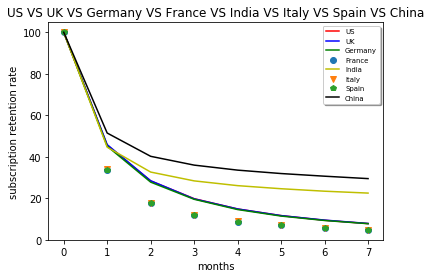

In [46]:
fig, ax = plt.subplots()
ax.plot(inp,sr_US, 'r', label='US')
ax.plot(inp,sr_UK, 'b', label='UK')
ax.plot(inp,sr_germany, 'g', label='Germany')
ax.plot(inp,sr_france, 'o', label='France')
ax.plot(inp,sr_India, 'y', label='India')
ax.plot(inp,sr_Italy, 'v', label='Italy')
ax.plot(inp,sr_Spain, 'p', label='Spain')
ax.plot(inp,sr_China, 'black', label='China')
plt.xlabel("months")
plt.ylabel("subscription retention rate")
plt.title("US VS UK VS Germany VS France VS India VS Italy VS Spain VS China")
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-small')
plt.show()

The company should market their products in India and chine as users from these countries are likely to stay subscribed.